In [178]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import preprocessing
from yellowbrick.classifier import ConfusionMatrix

In [179]:
df = pd.read_csv("letter-recognition.data", sep = ",")

In [194]:
df.head(10)

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
5,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
6,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
7,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
8,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8
9,X,3,9,5,7,4,8,7,3,8,5,6,8,2,8,6,7


In [180]:
names = ['Class',
         'x-box',
         'y-box',
         'width',
         'high',
         'onpix',
         'x-bar',
         'y-bar',
         'x2bar',
         'y2bar',
         'xybar',
         'x2ybr',
         'xy2br',
         'x-ege',
         'xegvy',
         'y-ege',
         'yegvx']

In [181]:
X = df.iloc[:, 1 : 17]
Y = df.select_dtypes(include = [object])


In [182]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [183]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [184]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [185]:
mlp = MLPClassifier(hidden_layer_sizes = (250, 300), max_iter = 1000000, activation = 'logistic')

In [186]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

ConfusionMatrix(ax=<Axes: >,
                classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                         'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
                         'W', 'X', 'Y', 'Z'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7f559436aa10>,
                estimator=MLPClassifier(activation='logistic',
                                        hidden_layer_sizes=(250, 300),
                                        max_iter=1000000))

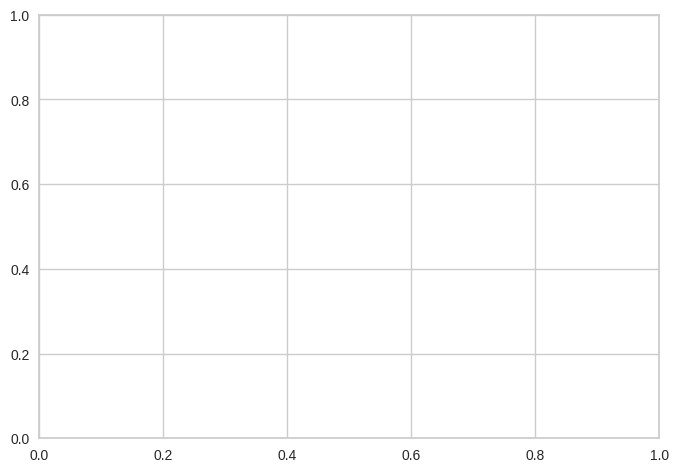

In [187]:
cm.fit(X_train, Y_train.values.ravel())

In [188]:
cm.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9745

In [189]:
predictions = cm.predict(X_test)

In [190]:
print("Accuracy: ", accuracy_score(Y_test, predictions))

Accuracy:  0.9745


In [191]:
print(confusion_matrix(Y_test, predictions))

[[170   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 138   0   0   1   0   0   0   0   0   1   1   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   0 158   0   0   0   0   0   0   0   0   0   0   1   1   0   0   1
    0   0   0   0   0   0   0   0]
 [  0   1   0 171   0   0   0   0   0   0   0   0   0   1   0   0   1   0
    0   0   0   0   0   0   0   0]
 [  0   0   2   0 144   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   0 133   0   0   1   0   0   0   0   0   0   1   0   0
    0   1   0   1   0   0   0   0]
 [  0   0   0   0   3   0 135   0   0   0   0   0   1   0   0   1   1   0
    0   0   0   0   0   0   0   0]
 [  0   1   0   2   0   0   1 123   0   0   3   0   0   2   0   0   1   3
    0   0   0   1   1   0   0   0]
 [  0   0   0   0   0   0   0   0 142   4   1   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   0   0  

In [192]:
print(classification_report(Y_test, predictions, digits=5))

              precision    recall  f1-score   support

           A    1.00000   1.00000   1.00000       170
           B    0.96503   0.95833   0.96167       144
           C    0.98137   0.98137   0.98137       161
           D    0.95531   0.98276   0.96884       174
           E    0.94737   0.97297   0.96000       148
           F    0.97080   0.97080   0.97080       137
           G    0.98540   0.95745   0.97122       141
           H    0.96850   0.89130   0.92830       138
           I    0.96599   0.95946   0.96271       148
           J    0.96454   0.97143   0.96797       140
           K    0.94406   0.99265   0.96774       136
           L    0.98214   0.98802   0.98507       167
           M    0.98817   0.99405   0.99110       168
           N    0.96078   0.98658   0.97351       149
           O    0.98000   0.95455   0.96711       154
           P    0.96815   0.95597   0.96203       159
           Q    0.95238   0.98592   0.96886       142
           R    0.95679   0

In [193]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>